In [1]:
import os

import pandas as pd
import sqlite3

root_dir = os.getcwd() + "/"
sloka_root = os.path.join(root_dir, "Slokas")
print(root_dir, sloka_root)


# Ramayanam metadata
KandaList = []

KandaDetails = {'num': 1, 'name': "BalaKanda", 'sargas': 77}
KandaList.append(KandaDetails)
KandaDetails = {'num': 2, 'name': "AyodhyaKanda", 'sargas': 119}
KandaList.append(KandaDetails)
KandaDetails = {'num': 3, 'name': "AranyaKanda", 'sargas': 75}
KandaList.append(KandaDetails)
KandaDetails = {'num': 4, 'name': "KishkindaKanda", 'sargas': 67}
KandaList.append(KandaDetails)
KandaDetails = {'num': 5, 'name': "SundaraKanda", 'sargas': 68}

KandaList.append(KandaDetails)

/Users/nmudivar/Projects/personal/ramayanam_text_analysis/ /Users/nmudivar/Projects/personal/ramayanam_text_analysis/Slokas


In [2]:
# Create Sqlite database
database = root_dir + "ramayanam.db"
print(database)

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

/Users/nmudivar/Projects/personal/ramayanam_text_analysis/ramayanam.db


In [3]:
conn = create_connection(database)

with conn:
    df = pd.read_sql("select * from slokas", conn)

In [4]:
df = df.drop(["meaning", "sloka", "index"], axis=1)
df.head()

,kanda_id,sarga_id,sloka_id,translation
0,1,1,1,"Ascetic Valmiki enquired of Narada, preeminent..."
1,1,1,2,Who in this world lives today endowed with exc...
2,1,1,3,"Who is that one gifted with good conduct, give..."
3,1,1,4,Who (among men) is selfrestrained? Who has con...
4,1,1,5,"O Maharshi, I intend to hear about such a man..."


In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl

# Just making the plots look better
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

In [6]:
def label_race (row):
    if row['kanda_id'] == 1 :
        return 'Balakanda'
    if row['kanda_id'] == 2 :
        return 'Ayodhyakanda'
    if row['kanda_id'] == 3:
        return 'Aranyakanda'
    if row['kanda_id']  == 4:
        return 'Kishkindakanda'
    return 'Sundarakanda'

df["kanda_name"] = df.apply (lambda row: label_race (row),axis=1)

In [7]:
df.tail()

,kanda_id,sarga_id,sloka_id,translation,kanda_name
13097,5,68,24,"'O noble lady the lions among men, Rama and La...",Sundarakanda
13098,5,68,25,"'You will see the lionlike Rama, a slayer of e...",Sundarakanda
13099,5,68,26,'You will hear before long the shouts of gener...,Sundarakanda
13100,5,68,27,"'You will soon see Rama, the slayer of enemies...",Sundarakanda
13101,5,68,28,Sita though afflicted heard from me that you w...,Sundarakanda


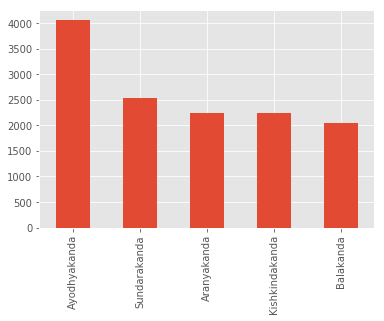

In [8]:
# Number of sloka translations vs kanda
df['kanda_name'].value_counts().plot.bar()

In [10]:
df['words'] =  df.translation.str.strip().str.split('[\W_+]')

df.head()
df.columns

Index(['kanda_id', 'sarga_id', 'sloka_id', 'translation', 'kanda_name',
       'words'],
      dtype='object')

In [11]:

for row in df[['kanda_name', 'sarga_id', 'words']].iterrows():
    print(row)
    break

(0, kanda_name                                            Balakanda
sarga_id                                                      1
words         [Ascetic, Valmiki, enquired, of, Narada, , pre...
Name: 0, dtype: object)


In [12]:
rows = list()

for row in df[['kanda_name', 'sarga_id', 'words']].iterrows():
    r = row[1]
    if not r.words:
        continue
    for word in r.words:
        
        rows.append((r.kanda_name, word))
        
words = pd.DataFrame(rows, columns=['kanda_name', 'word'])
words.head()

,kanda_name,word
0,Balakanda,Ascetic
1,Balakanda,Valmiki
2,Balakanda,enquired
3,Balakanda,of
4,Balakanda,Narada


In [10]:
for row in df[['kanda_name', 'words']].iterrows():
    r = row[1]
    print(r.words)
    if r.words is None:
        continue
    for word in r.words:
        rows.append((r.kanda_name, word))

KeyError: "['words'] not in index"

In [51]:
words = pd.DataFrame(rows, columns=['kanda', 'word'])
words.head()

,kanda,word
0,Balakanda,Ascetic
1,Balakanda,Valmiki
2,Balakanda,enquired
3,Balakanda,of
4,Balakanda,Narada


In [54]:
words = words[words.word.str.len() > 0]
words.head()


,kanda,word
0,Balakanda,Ascetic
1,Balakanda,Valmiki
2,Balakanda,enquired
3,Balakanda,of
4,Balakanda,Narada


In [56]:
counts = words.groupby('kanda')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

n_w
kanda       word      
Aranyakanda the   3431
            of    2186
            and   1739
            to    1077
            with   943

n_w
kanda          word      
Aranyakanda    the   3431
               of    2186
               and   1739
               to    1077
               with   943
Ayodhyakanda   the   6944
               of    4226
               and   3443
               to    2560
               in    1840
Balakanda      the   5076
               of    3425
               and   2240
               to    1485
               in    1346
Kishkindakanda the   3553
               of    2397
               and   1763
               to    1148
               in     994
Sundarakanda   the   4095
               of    2800
               and   2102
               to    1347
               with  1129

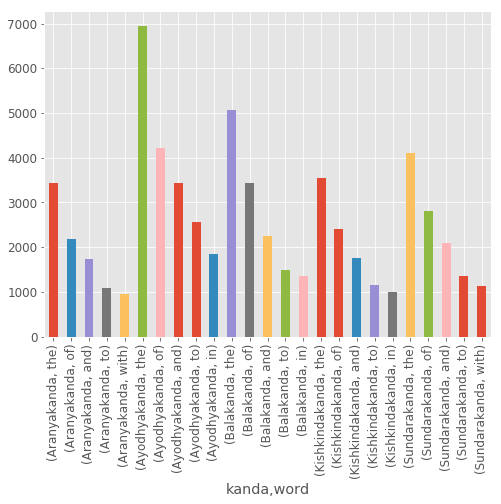

In [57]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])

ModuleNotFoundError: No module named 'nltk'

In [14]:
import spacy

ModuleNotFoundError: No module named 'spacy'